In [2]:
import pandas as pd
import numpy as np

In [3]:
pop=pd.read_csv("https://covid19-lake.s3.us-east-2.amazonaws.com/static-datasets/csv/CountyPopulation/County_Population.csv")
cases_deaths=pd.read_csv("https://covid19-lake.s3.us-east-2.amazonaws.com/rearc-covid-19-nyt-data-in-usa/csv/us-counties/us-counties.csv")
state_unique = cases_deaths.state.unique()
county_unique = pop.County.unique()

In [4]:
state = input("Please provide the state you would like to review: "  )
if state not in state_unique:
    raise ValueError("Please retype the name of the state: ")

Please provide the state you would like to review:  California


In [5]:
def state_county_pop_filter(state):
    return pop[pop.State==state]

State_Pop_Data = state_county_pop_filter(state)

In [6]:
County_List = []
date_l = (input('Please provide the ending date in the format YYYY-MM-DD: '))
date_e = (input('Please provide the initial date in the format YYYY-MM-DD: '))
top = int(input('Please provide a number for the top counties you would like to view: '))
n = int(input('Please provide number of days you would like to see on the graph: '))

County_List = []
for county in State_Pop_Data.County.values:
    if county not in ['Garfield','Gilliam', 'Wheeler','Modoc', 'Harmon', 'Roger Mills']:
        County_List.append(county)


county_of_i='start'
Counties_of_interest = []
Counties_of_interest_pc = []
while county_of_i != "Done":
    county_of_i = input("Please add the county you would like to review or type 'Done'")
    if county_of_i != "Done":
        Counties_of_interest.append([1,county_of_i])
        Counties_of_interest_pc.append([1,county_of_i])

Please provide the ending date in the format YYYY-MM-DD:  2020-07-15
Please provide the initial date in the format YYYY-MM-DD:  2020-07-01
Please provide a number for the top counties you would like to view:  10
Please provide number of days you would like to see on the graph:  60
Please add the county you would like to review or type 'Done' Santa Barbara
Please add the county you would like to review or type 'Done' Ventura
Please add the county you would like to review or type 'Done' San Diego
Please add the county you would like to review or type 'Done' Alameda
Please add the county you would like to review or type 'Done' Done


In [7]:
## Population data

# Create function to pull county populations for a state

Population_List = []
def get_population_values(X):
    for county in (County_List):
        county_pop = State_Pop_Data[State_Pop_Data.County == county]
        county_pop_data = county_pop["Population Estimate 2018"].max()
        Population_List.append(county_pop_data)
    return Population_List
Pop = get_population_values(County_List)

In [8]:
## Case and Death data
state_cases_deaths=cases_deaths[cases_deaths.state==state]

In [9]:
## Create a function to create list for plotting. Create list of cases or deaths
data_list_cases = []
data_list_deaths = []
pc_data_list_cases = []
pc_data_list_deaths = []


def create_state_list(X):
    
    for county in (County_List):
        county_state_cases_deaths=state_cases_deaths[state_cases_deaths.county==county]
        data_county_cases = county_state_cases_deaths["cases"].max()
        data_county_deaths = county_state_cases_deaths["deaths"].max()
        data_list_cases.append(data_county_cases)
        data_list_deaths.append(data_county_deaths)
    
    for i in range(len(County_List)): 
        x = (data_list_cases[i]/Population_List[i])*100000
        y = (data_list_deaths[i]/Population_List[i])*100000
        pc_data_list_cases.append(x)
        pc_data_list_deaths.append(y)
    return data_list_cases, data_list_deaths, pc_data_list_cases, pc_data_list_deaths
    
Data = create_state_list(County_List)

In [10]:
# Create a function that identifies the Total increase in cases for all states over a specified time period

def get_county_data(County_List,date_l,date_e):
    Totals = []
    for i in range(len(County_List)):  
        county_data = state_cases_deaths[state_cases_deaths.county==County_List[i]]
        date1 = county_data[county_data.date == date_l]
        date2 = county_data[county_data.date == date_e]
        date1_values = date1.cases.values[0]
        date2_values = date2.cases.values[0]
        x = (date1_values - date2_values)
        X = [x,County_List[i]]
        Totals.append(X)
    return Totals

In [11]:
Totals = get_county_data(County_List, date_l, date_e)

In [12]:
# Create a function that identifies the Total increase Per Capita

def get_total_pc_data(X):
    Total_pc = []
    for x in range(len(X)):
        y = (X[x][0])/(int(Pop[x]))*100000
        Y = [y,X[x][1]]
        Total_pc.append(Y)
    return Total_pc

In [13]:
Total_pc = get_total_pc_data(Totals)

In [14]:

# Define a function for sorting a list numerically, grabbing the top number, creating an array for graphing

def get_top_number(X):
    X.sort()
    X = X[len(County_List)-top:]
    return X

In [15]:
Totals_top = get_top_number(Totals)
Total_top_pc = get_top_number(Total_pc)

In [16]:
# Create a list of values of Total cases for the past "n" number of days

for i in range(len(Totals_top)):
    county_data = state_cases_deaths[state_cases_deaths.county==Totals_top[i][1]]
    county_data_graph = county_data.cases.values
    county_data_graph = county_data_graph[len(county_data_graph)-n:]
    Totals_top[i][0] = county_data_graph

In [17]:
# Create a list of values of Total Per Capita cases for the past "n" number of days

for i in range(len(Total_top_pc)):
    county_data = state_cases_deaths[state_cases_deaths.county==Total_top_pc[i][1]]
    county_data_graph = county_data.cases.values
    county_data_graph = county_data_graph[len(county_data_graph)-n:]
    county_pop = State_Pop_Data[State_Pop_Data.County == Total_top_pc[i][1]]
    county_pop_data = county_pop['Population Estimate 2018'].values
    Total_top_pc[i][0] = ((county_data_graph)/(county_pop_data))*100000

In [18]:
for i in range(len(Counties_of_interest)):
    county_data = state_cases_deaths[state_cases_deaths.county==Counties_of_interest[i][1]]
    county_data_graph = county_data.cases.values
    county_data_graph = county_data_graph[len(county_data_graph)-n:]
    Counties_of_interest[i][0] = county_data_graph

In [19]:
for i in range(len(Counties_of_interest_pc)):
    county_data = state_cases_deaths[state_cases_deaths.county==Counties_of_interest_pc[i][1]]
    county_data_graph = county_data.cases.values
    county_data_graph = county_data_graph[len(county_data_graph)-n:]
    county_pop = State_Pop_Data[State_Pop_Data.County == Counties_of_interest[i][1]]
    county_pop_data = county_pop['Population Estimate 2018'].values
    Counties_of_interest_pc[i][0] = ((county_data_graph)/(county_pop_data))*100000

In [20]:
Counties_of_interest

[[array([1468, 1489, 1509, 1521, 1533, 1544, 1554, 1566, 1573, 1597, 1616,
         1629, 1642, 1656, 1660, 1662, 1686, 1708, 1729, 1779, 1795, 1815,
         1818, 1838, 1855, 1899, 1959, 1969, 1999, 2049, 2100, 2155, 2228,
         2293, 2293, 2358, 2430, 2478, 2553, 2591, 2666, 2784, 2831, 2872,
         2933, 3164, 3268, 3385, 3406, 3520, 3671, 3763, 3866, 3985, 4068,
         4177, 4283, 4353, 4441, 4641]),
  'Santa Barbara'],
 [array([ 813,  838,  850,  861,  883,  912,  937,  961,  982, 1020, 1033,
         1065, 1083, 1093, 1116, 1152, 1164, 1190, 1216, 1261, 1274, 1303,
         1341, 1382, 1407, 1466, 1518, 1534, 1567, 1633, 1656, 1706, 1753,
         1781, 1865, 1946, 2030, 2161, 2260, 2314, 2346, 2444, 2527, 2740,
         2926, 3096, 3240, 3394, 3536, 3687, 3866, 3912, 3992, 4139, 4278,
         4416, 4545, 4724, 4800, 4950]),
  'Ventura'],
 [array([ 5899,  6009,  6089,  6203,  6378,  6497,  6622,  6764,  6860,
          6945,  7046,  7163,  7303,  7448,  7544,  7617,  773

In [21]:
Counties_of_interest_pc

[[array([ 328.7595151 ,  333.46247819,  337.94149066,  340.62889814,
          343.31630562,  345.77976248,  348.01926871,  350.70667619,
          352.27433056,  357.64914552,  361.90420736,  364.81556546,
          367.72692357,  370.8622323 ,  371.75803479,  372.20593604,
          377.580751  ,  382.50766471,  387.2106278 ,  398.40815897,
          401.99136894,  406.47038141,  407.14223328,  411.62124575,
          415.42840634,  425.28223377,  438.71927118,  440.95877741,
          447.67729611,  458.87482728,  470.29630907,  482.61359335,
          498.96198886,  513.51877938,  513.51877938,  528.0755699 ,
          544.20001478,  554.9496447 ,  571.74594145,  580.25606514,
          597.0523619 ,  623.47853545,  634.00421475,  643.18619031,
          656.84717833,  708.57977233,  731.87063716,  758.0728601 ,
          762.77582319,  788.30619425,  822.12273838,  842.72619573,
          865.79310994,  892.44323412,  911.03113586,  935.4417538 ,
          959.18051988,  974.85706

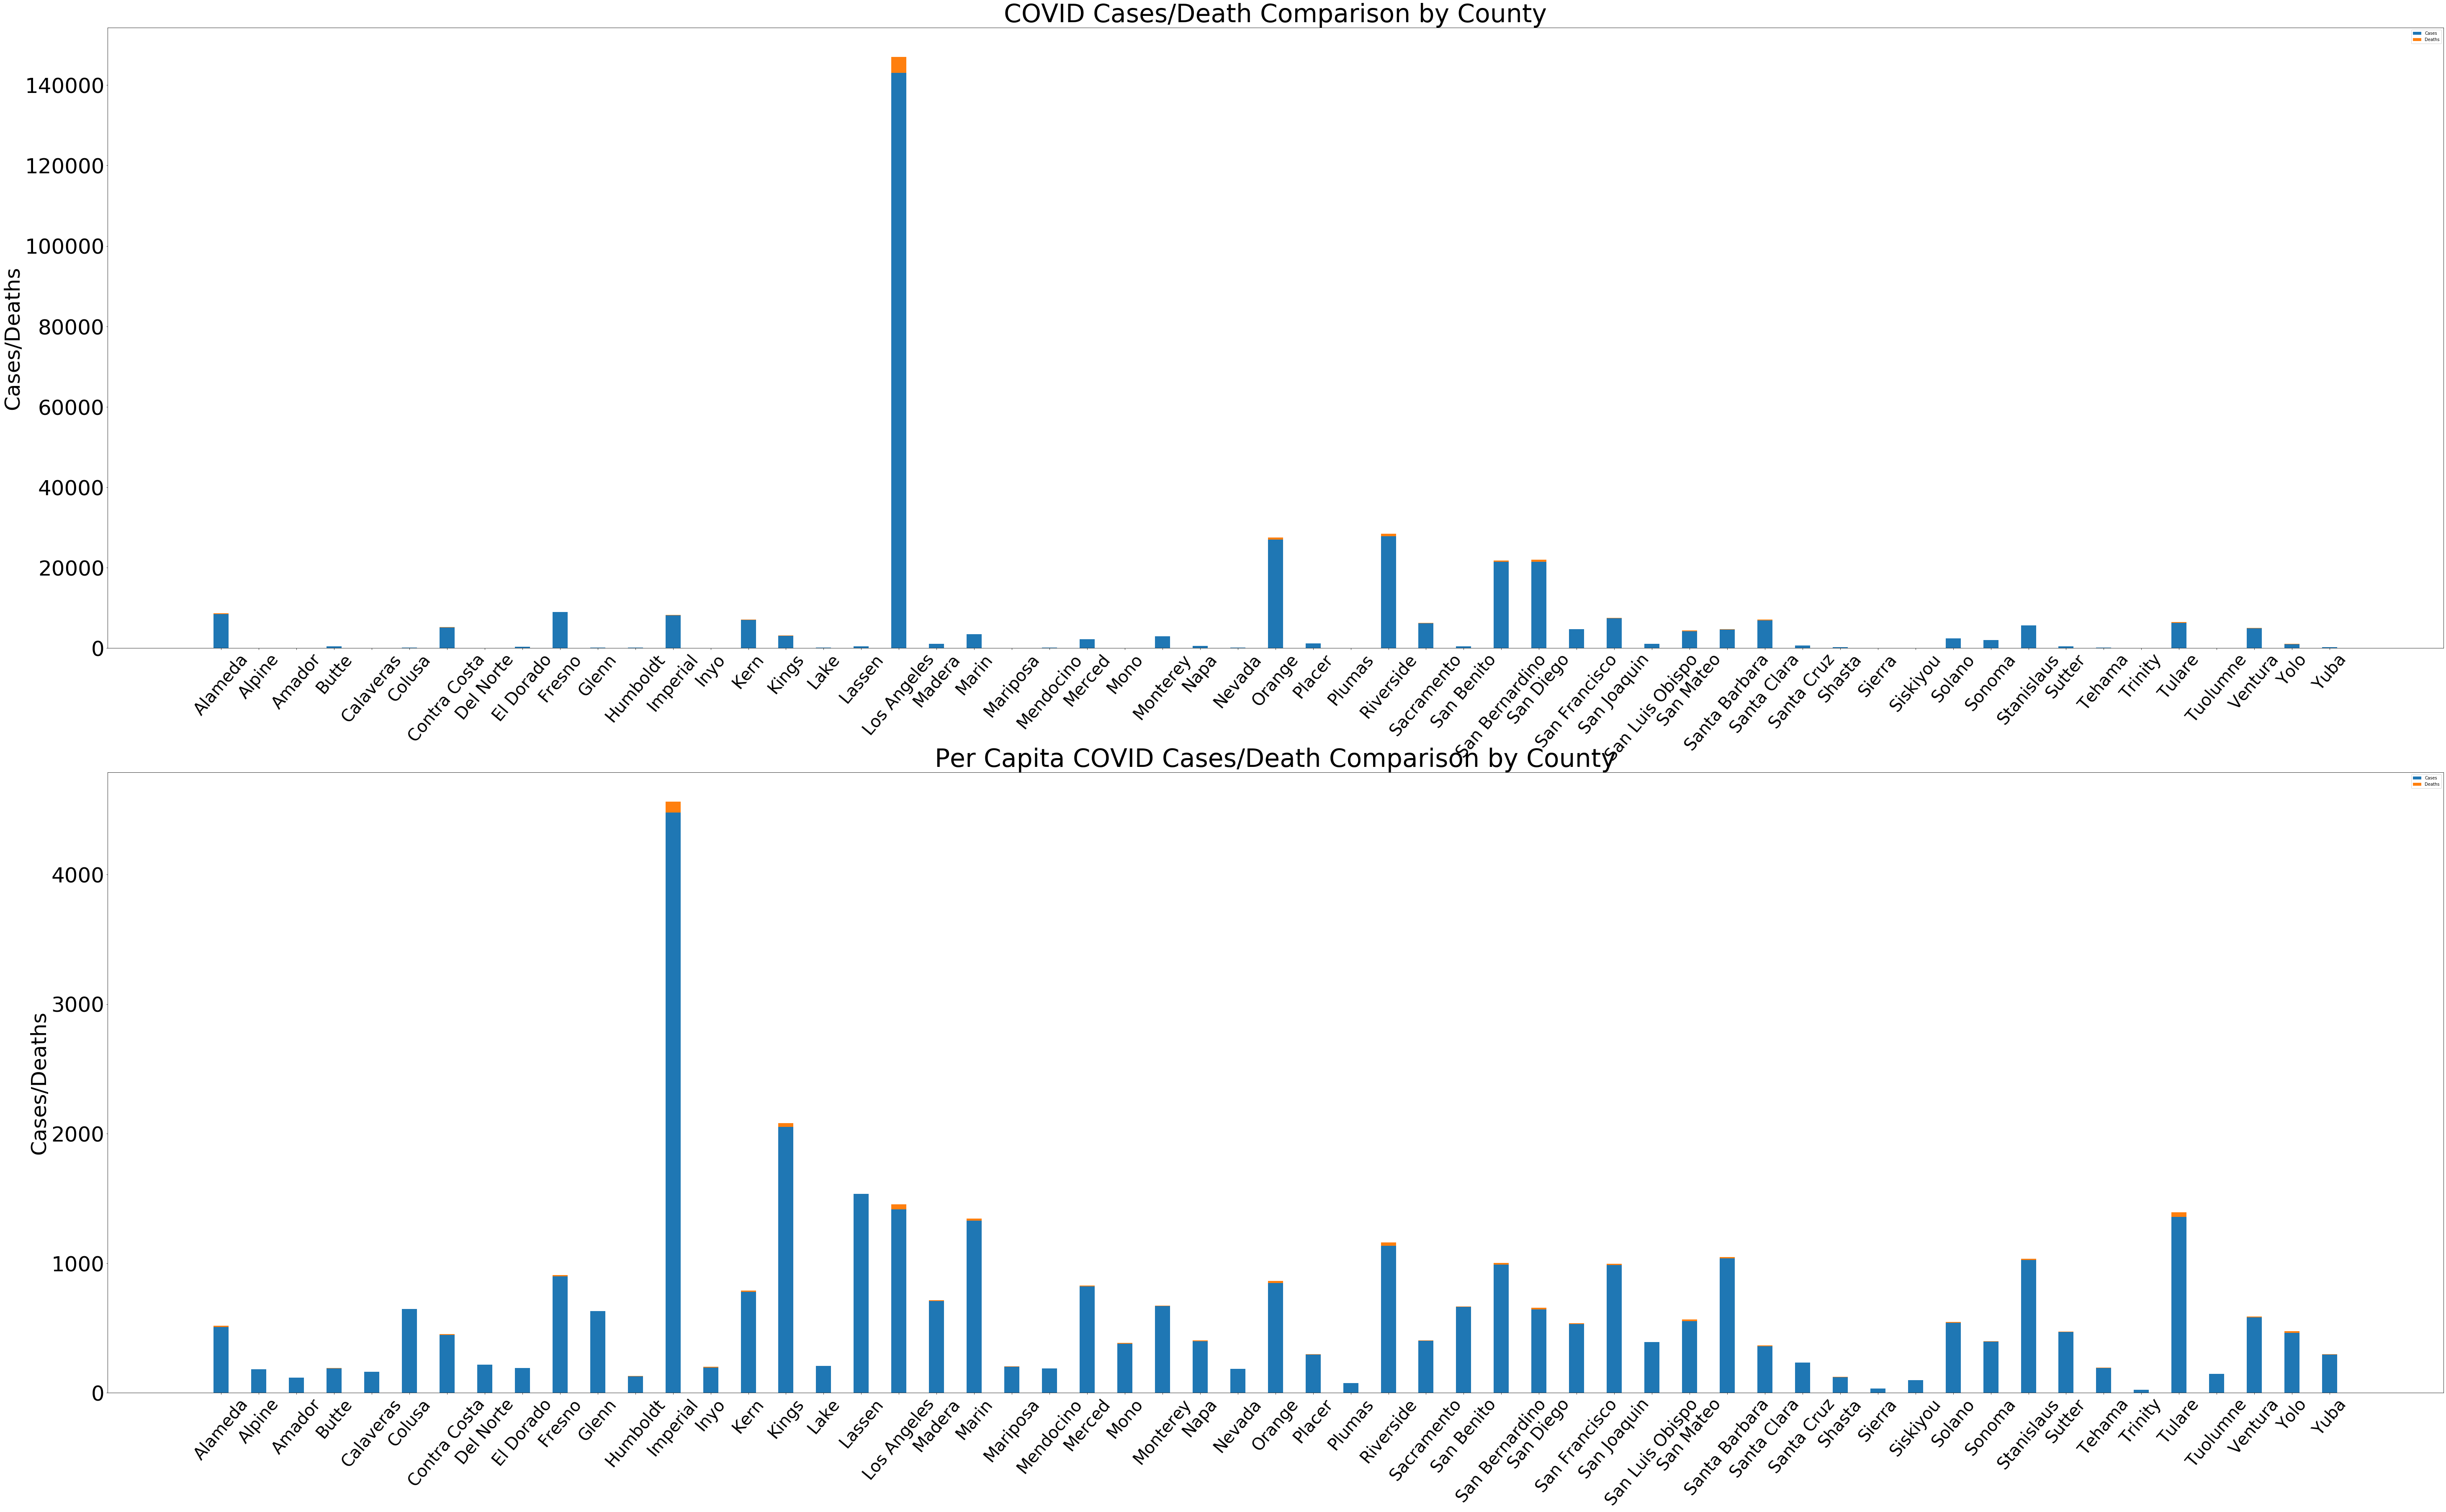

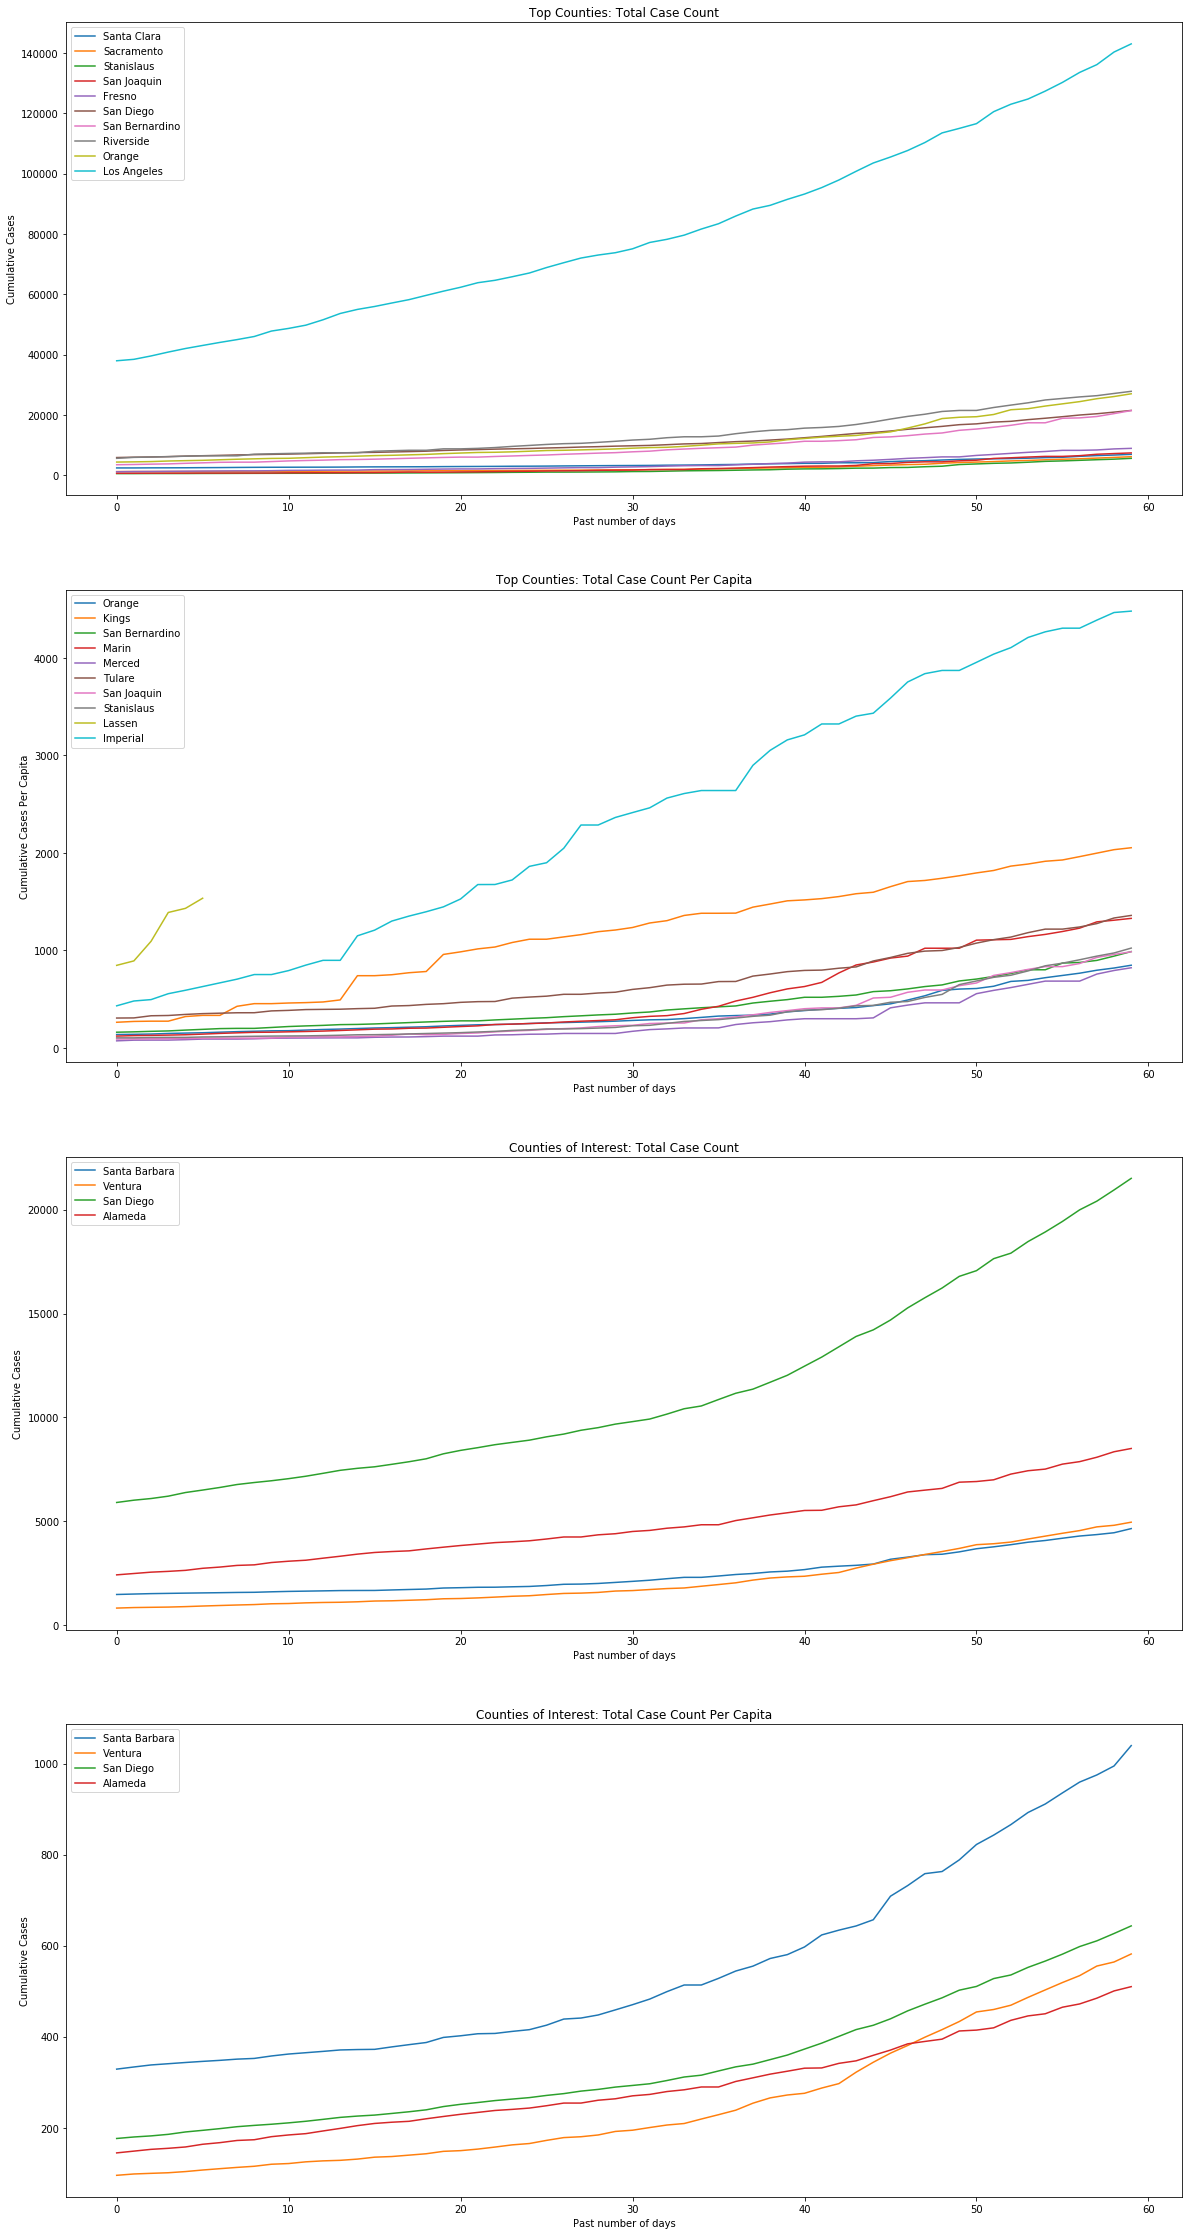

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure(figsize = (100, 60))
  
ax=fig.add_subplot(211)
n = len(County_List)
ind = np.arange(n)
width = .4
p1 = plt.bar(ind,data_list_cases, width)
p2 = plt.bar(ind,data_list_deaths, width, bottom = data_list_cases)

plt.ylabel("Cases/Deaths", fontsize=50)
plt.title ("COVID Cases/Death Comparison by County", fontsize = 60)
plt.xticks(ind, County_List, fontsize=40, rotation=50)
plt.yticks(fontsize=50)
plt.legend((p1[0],p2[0]), ("Cases", "Deaths"))

ax=fig.add_subplot(212)
n = len(County_List)
ind = np.arange(n)
width = .4
p1 = plt.bar(ind,pc_data_list_cases, width)
p2 = plt.bar(ind,pc_data_list_deaths, width, bottom = pc_data_list_cases)

plt.ylabel("Cases/Deaths", fontsize=50)
plt.title ("Per Capita COVID Cases/Death Comparison by County", fontsize=60)
plt.xticks(ind, County_List, fontsize=40, rotation=50)
plt.yticks(fontsize=50)
plt.legend((p1[0],p2[0]), ("Cases", "Deaths"))

fig=plt.figure(figsize = (20,40))

ax=fig.add_subplot(411)
for i in range(len(Totals_top)):
    ax.plot(Totals_top[i][0], label=Totals_top[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Cumulative Cases', fontsize = 10)
    ax.set_title('Top Counties: Total Case Count')
    
ax=fig.add_subplot(412)
for i in range(len(Total_top_pc)):
    ax.plot(Total_top_pc[i][0], label=Total_top_pc[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Cumulative Cases Per Capita', fontsize = 10)
    ax.set_title('Top Counties: Total Case Count Per Capita')

ax=fig.add_subplot(413)
for i in range(len(Counties_of_interest)):
    ax.plot(Counties_of_interest[i][0], label=Counties_of_interest[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Cumulative Cases', fontsize = 10)
    ax.set_title('Counties of Interest: Total Case Count')
    
ax=fig.add_subplot(414)
for i in range(len(Counties_of_interest_pc)):
    ax.plot(Counties_of_interest_pc[i][0], label=Counties_of_interest[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Cumulative Cases', fontsize = 10)
    ax.set_title('Counties of Interest: Total Case Count Per Capita')